<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/google-stock-price-20-yr.csv

--2025-03-05 14:15:13--  https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/google-stock-price-20-yr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1391394 (1.3M) [text/plain]
Saving to: ‘google-stock-price-20-yr.csv.7’

google-stock-price- 100%[===================>]   1.33M  --.-KB/s    in 0.07s   

2025-03-05 14:15:13 (19.6 MB/s) - ‘google-stock-price-20-yr.csv.7’ saved [1391394/1391394]



In [ ]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/apple-stock-price-20-yr.csv

--2025-03-05 14:15:13--  https://raw.githubusercontent.com/wannasmile/colab_code_note/refs/heads/main/apple-stock-price-20-yr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1388083 (1.3M) [text/plain]
Saving to: ‘apple-stock-price-20-yr.csv.7’

apple-stock-price-2 100%[===================>]   1.32M  --.-KB/s    in 0.07s   

2025-03-05 14:15:14 (20.1 MB/s) - ‘apple-stock-price-20-yr.csv.7’ saved [1388083/1388083]



In [ ]:
# 设置以获得稳定的结果

import tensorflow as tf
import os
import numpy as np
import random

# 设置随机种子
SEED = 0

# 设置随机种子函数
def set_seeds(seed=SEED):
    # 设置 Python 哈希种子
    os.environ['PYTHONHASHSEED'] = str(seed)
    # 设置 Python 随机种子
    random.seed(seed)
    # 设置 TensorFlow 随机种子
    tf.random.set_seed(seed)
    # 设置 NumPy 随机种子
    np.random.seed(seed)

# 设置全局确定性函数
def set_global_determinism(seed=SEED):
    # 设置随机种子
    set_seeds(seed=seed)

    # 设置 TensorFlow 确定性操作
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # 设置 TensorFlow CUDA 确定性操作
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    # 设置 TensorFlow 线程间并行度
    tf.config.threading.set_inter_op_parallelism_threads(1)
    # 设置 TensorFlow 线程内并行度
    tf.config.threading.set_intra_op_parallelism_threads(1)

# 调用上述函数以设置种子值
set_global_determinism(seed=SEED)

重要！

请在执行任何其他代码之前运行上面的单元格。

由于代码是确定性的，因此模型训练可能会变慢（权衡）。

In [ ]:
!pip install pandas-datareader
!pip install yfinance
!pip install pandas-ta

In [ ]:
!pip install scikeras
# 导入必要的库
import pandas as pd
import numpy as np
import pandas_ta

import matplotlib.pyplot as plt
import seaborn as sns

# 用于从雅虎财经读取股票数据
import pandas_datareader as pdr
import yfinance as yf

# 用于时间戳
from datetime import datetime

# 用于数据缩放和模型评估
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

# 用于模型构建
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from scikeras.wrappers import KerasRegressor
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df_google = pd.read_csv('google-stock-price-20-yr.csv', delimiter = ',', index_col = 'date')
df_google.index = pd.to_datetime(df_google.index)
df_google.head(5)

,open,high,low,close,adj_close,volume,garman_klass_volatility,dollar_volume,obv,macd,ma_3_days,ma_5_days,ma_10_days,ma_12_days,ma_20_days
date,,,,,,,,,,,,,,,
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.000723,998.473562,0,0.000000,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.001392,799.384793,-306396159,-0.009000,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.000727,486.929249,-121750647,-0.013704,2.655928,NaN,NaN,NaN,NaN
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.000204,382.752875,20821754,-0.013439,2.643572,NaN,NaN,NaN,NaN
2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.000229,329.645194,-104004378,-0.016574,2.654186,2.658648,NaN,NaN,NaN


数据可视化：趋势与关联性

绘制 20 年的数据会使股票表现和随时间推移的变化难以解读，因此我们将根据以下时间段分别绘制图表：

* 2004-2008
* 2008-2012 -- 房地产危机及复苏时期
* 2012-2019 -- 新冠疫情爆发前
* 2019-2022 -- 新冠疫情期间
* 2022-2024 -- 新冠疫情后及复苏时期

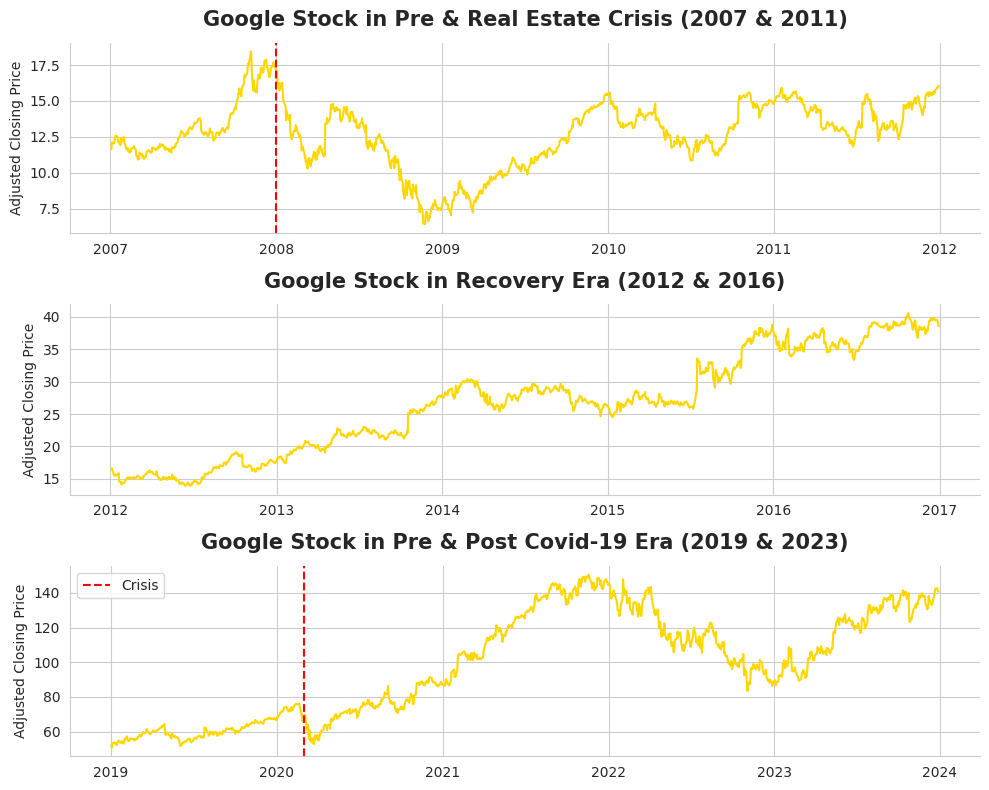

In [ ]:
# 设置 seaborn 样式
sns.set_style('whitegrid')
# 创建一个包含 3 行 1 列的子图
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# 绘制 2007 年到 2011 年的谷歌股票价格
axs[0].plot(df_google.loc['2007':'2011', 'adj_close'], color='gold')
# 设置子图标题，表示房地产危机前后时期
axs[0].set_title('Google Stock in Pre & Real Estate Crisis (2007 & 2011)',
                 fontsize=15, fontweight='bold', pad=12)
# 添加垂直线，标记 2008 年
axs[0].axvline(x=pd.to_datetime('2008-01'), color='red', linestyle='--', label='Year 2008')

# 绘制 2012 年到 2016 年的谷歌股票价格
axs[1].plot(df_google.loc['2012':'2016', 'adj_close'], color='gold')
# 设置子图标题，表示经济复苏时期
axs[1].set_title('Google Stock in Recovery Era (2012 & 2016)',
                 fontsize=15, fontweight='bold', pad=12)

# 绘制 2019 年到 2023 年的谷歌股票价格
axs[2].plot(df_google.loc['2019':'2023', 'adj_close'], color='gold')
# 设置子图标题，表示新冠疫情前后时期
axs[2].set_title('Google Stock in Pre & Post Covid-19 Era (2019 & 2023)',
                 fontsize=15, fontweight='bold', pad=12)
# 添加垂直线，标记 2020 年 3 月，表示疫情危机
axs[2].axvline(x=pd.to_datetime('2020-03'), color='red', linestyle='--', label='Crisis')

# 为所有子图设置 y 轴标签
for ax in axs.flat:
    ax.set(ylabel='Adjusted Closing Price')

# 调整子图布局
plt.tight_layout()
# 显示图例
plt.legend()
# 去除边框
sns.despine()
# 显示图表
plt.show()

在 2008 年经济危机确立之后，谷歌的股票价格严重下跌，并在 2008 年最后一个季度跌至最低点。

与房地产危机相比，苹果的股票价格受新冠疫情的影响程度较小。

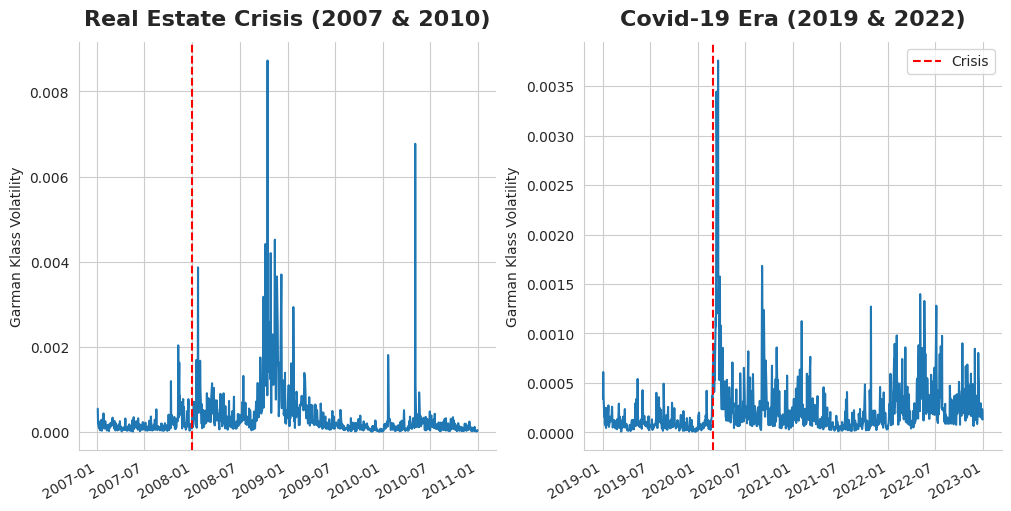

In [ ]:
import matplotlib.dates as mdates
# 设置 seaborn 样式
sns.set_style('whitegrid')
# 创建一个包含 1 行 2 列的子图，并设置布局为 'constrained'
fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

# 在第一个子图中绘制 2007 年到 2010 年的 Garman Klass 波动率
axs[0].plot(df_google.loc['2007':'2010', 'garman_klass_volatility'])
# 设置第一个子图的标题，表示房地产危机时期
axs[0].set_title('Real Estate Crisis (2007 & 2010)', fontsize=16, fontweight='bold', pad=12)
# 在第一个子图中添加垂直线，标记 2008 年
axs[0].axvline(x=pd.to_datetime('2008-01'), color='red', linestyle='--', label='Year 2008')

# 在第二个子图中绘制 2019 年到 2022 年的 Garman Klass 波动率
axs[1].plot(df_google.loc['2019':'2022', 'garman_klass_volatility'])
# 设置第二个子图的标题，表示新冠疫情时期
axs[1].set_title('Covid-19 Era (2019 & 2022)', fontsize=16, fontweight='bold', pad=12)
# 在第二个子图中添加垂直线，标记 2020 年 3 月，表示疫情危机
axs[1].axvline(x=pd.to_datetime('2020-03'), color='red', linestyle='--', label='Crisis')

# 格式化日期标签
date_format = mdates.DateFormatter('%Y-%m')
# 为所有子图设置 y 轴标签
for ax in axs.flat:
    ax.set(ylabel='Garman Klass Volatility')  # 设置 y 轴标签
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # 自动调整日期标签位置
    ax.xaxis.set_major_formatter(date_format)  # 应用日期格式
    fig.autofmt_xdate()  # 自动旋转日期标签以避免重叠

# 去除边框
sns.despine()
# 显示图例
plt.legend()
# 显示图表
plt.show()

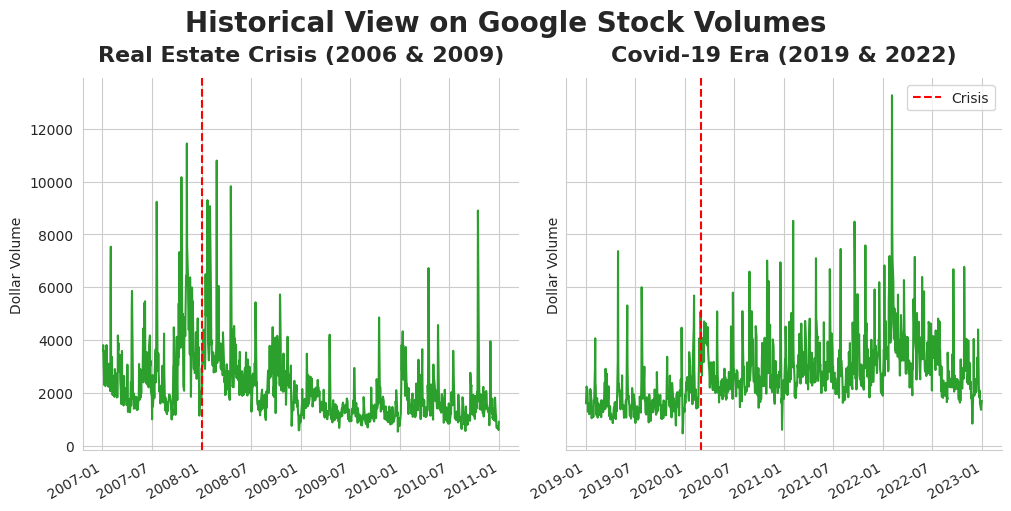

In [ ]:
# 创建一个包含 1 行 2 列的子图，并设置布局为 'constrained'，共享 y 轴
fig, axs = plt.subplots(1, 2, figsize=(10, 5), layout='constrained', sharey=True)

# 在第一个子图中绘制 2007 年到 2010 年的美元交易量，颜色为绿色
axs[0].plot(df_google.loc['2007':'2010', 'dollar_volume'], 'tab:green')
# 设置第一个子图的标题，表示房地产危机时期
axs[0].set_title('Real Estate Crisis (2006 & 2009)', fontsize=16, fontweight='bold', pad=12)
# 在第一个子图中添加垂直线，标记 2008 年，颜色为红色，虚线样式
axs[0].axvline(x=pd.to_datetime('2008-01'), color='red', linestyle='--', label='Year 2008')

# 在第二个子图中绘制 2019 年到 2022 年的美元交易量，颜色为绿色
axs[1].plot(df_google.loc['2019':'2022', 'dollar_volume'], 'tab:green')
# 设置第二个子图的标题，表示新冠疫情时期
axs[1].set_title('Covid-19 Era (2019 & 2022)', fontsize=16, fontweight='bold', pad=12)
# 在第二个子图中添加垂直线，标记 2020 年 3 月，颜色为红色，虚线样式
axs[1].axvline(x=pd.to_datetime('2020-03'), color='red', linestyle='--', label='Crisis')


# 设置总标题，表示谷歌股票交易量的历史视图
fig.suptitle('Historical View on Google Stock Volumes', fontsize=20, fontweight='bold')

# 格式化日期标签
date_format = mdates.DateFormatter('%Y-%m')
# 为所有子图设置 y 轴标签为“美元交易量”
for ax in axs.flat:
    ax.set(ylabel='Dollar Volume')  # 设置 y 轴标签为英文
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # 自动调整日期标签位置
    ax.xaxis.set_major_formatter(date_format)  # 应用日期格式
    fig.autofmt_xdate()  # 自动旋转日期标签以避免重叠

# 去除边框
sns.despine()
# 显示图例
plt.legend()
# 显示图表
plt.show()

两次危机都对股票的 Garman Klass 波动率产生了显著影响。

全球危机都影响了美元交易量，但是，2008 年金融危机的影响比新冠疫情更为剧烈。

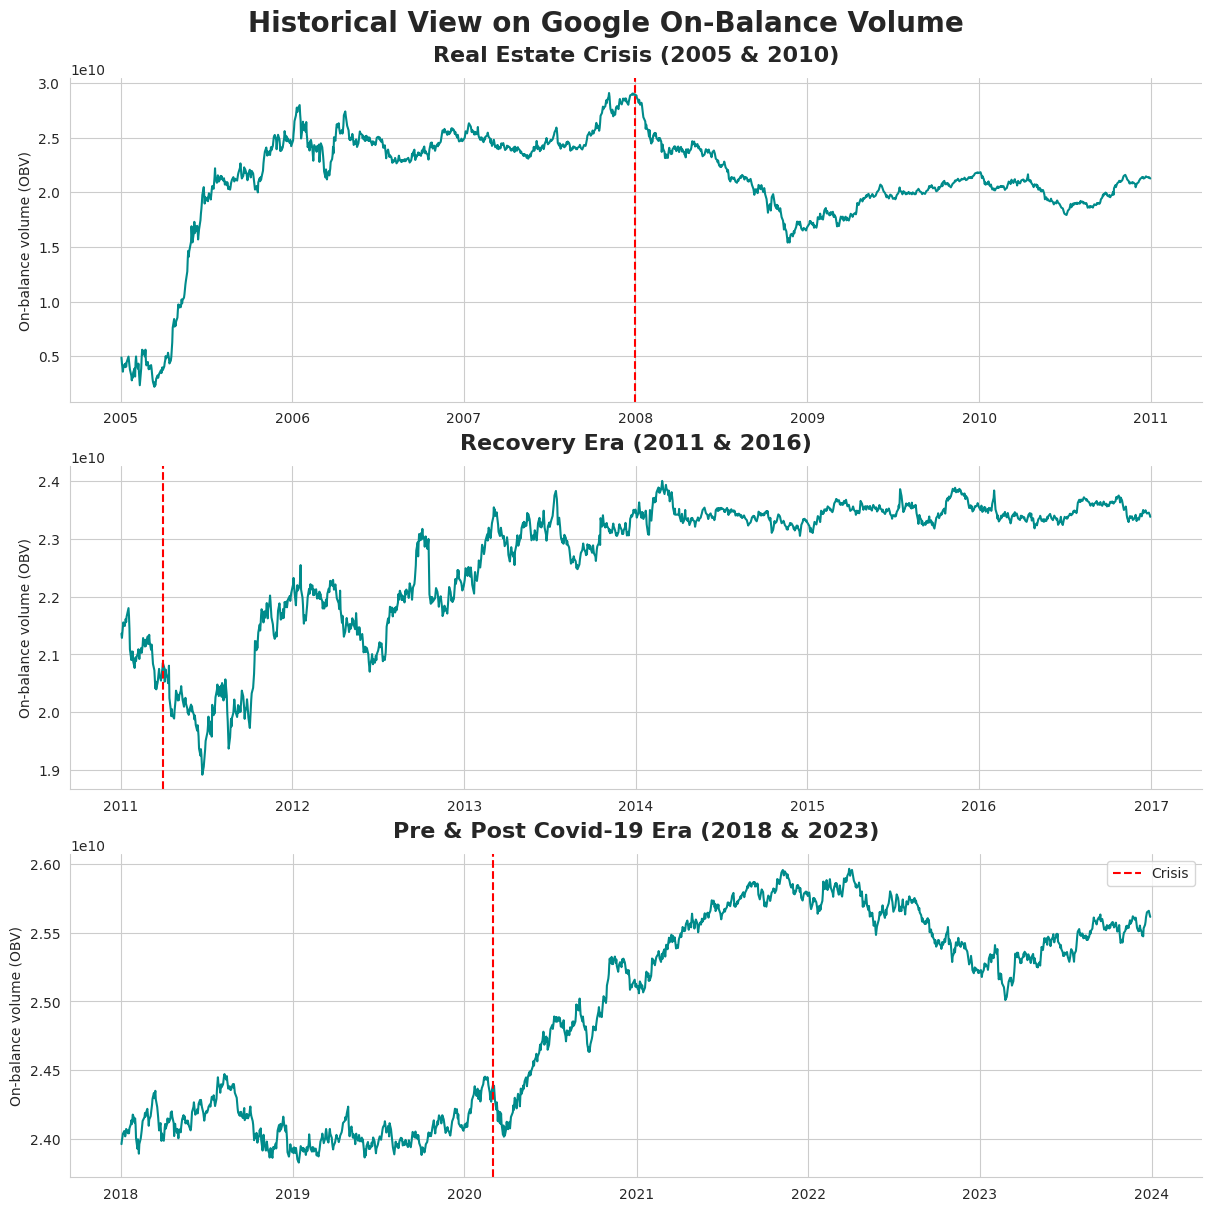

In [ ]:
# 创建一个包含 3 行 1 列的子图，并设置布局为 'constrained'
fig, axs = plt.subplots(3, 1, figsize=(12, 12), layout='constrained')

# 在第一个子图中绘制 2005 年到 2010 年的平衡交易量 (OBV)，颜色为深青色
axs[0].plot(df_google.loc['2005':'2010', 'obv'], color='darkcyan')
# 设置第一个子图的标题，表示房地产危机时期
axs[0].set_title('Real Estate Crisis (2005 & 2010)', fontsize=16, fontweight='bold', pad=12)
# 在第一个子图中添加垂直线，标记 2008 年，颜色为红色，虚线样式
axs[0].axvline(x=pd.to_datetime('2008-01'), color='red', linestyle='--', label='Year 2008')

# 在第二个子图中绘制 2011 年到 2016 年的平衡交易量 (OBV)，颜色为深青色
axs[1].plot(df_google.loc['2011':'2016', 'obv'], color='darkcyan')
# 设置第二个子图的标题，表示经济复苏时期
axs[1].set_title('Recovery Era (2011 & 2016)', fontsize=16, fontweight='bold', pad=12)
# 在第二个子图中添加垂直线，标记 2012 年，颜色为红色，虚线样式
axs[1].axvline(x=pd.to_datetime('2011-04'), color='red', linestyle='--', label='Year 2012')

# 在第三个子图中绘制 2018 年到 2023 年的平衡交易量 (OBV)，颜色为深青色
axs[2].plot(df_google.loc['2018':'2023', 'obv'], color='darkcyan')
# 设置第三个子图的标题，表示新冠疫情前后时期
axs[2].set_title('Pre & Post Covid-19 Era (2018 & 2023)', fontsize=16, fontweight='bold', pad=12)
# 在第三个子图中添加垂直线，标记 2020 年 3 月，颜色为红色，虚线样式
axs[2].axvline(x=pd.to_datetime('2020-03'), color='red', linestyle='--', label='Crisis')

# 设置总标题，表示谷歌平衡交易量的历史视图
fig.suptitle('Historical View on Google On-Balance Volume', fontsize=20, fontweight='bold')

# 为所有子图设置 y 轴标签为“平衡交易量 (OBV)”
for ax in axs.flat:
    ax.set(ylabel='On-balance volume (OBV)')  # 设置 y 轴标签

# 去除边框
sns.despine()
# 显示图例
plt.legend()
# 显示图表
plt.show()

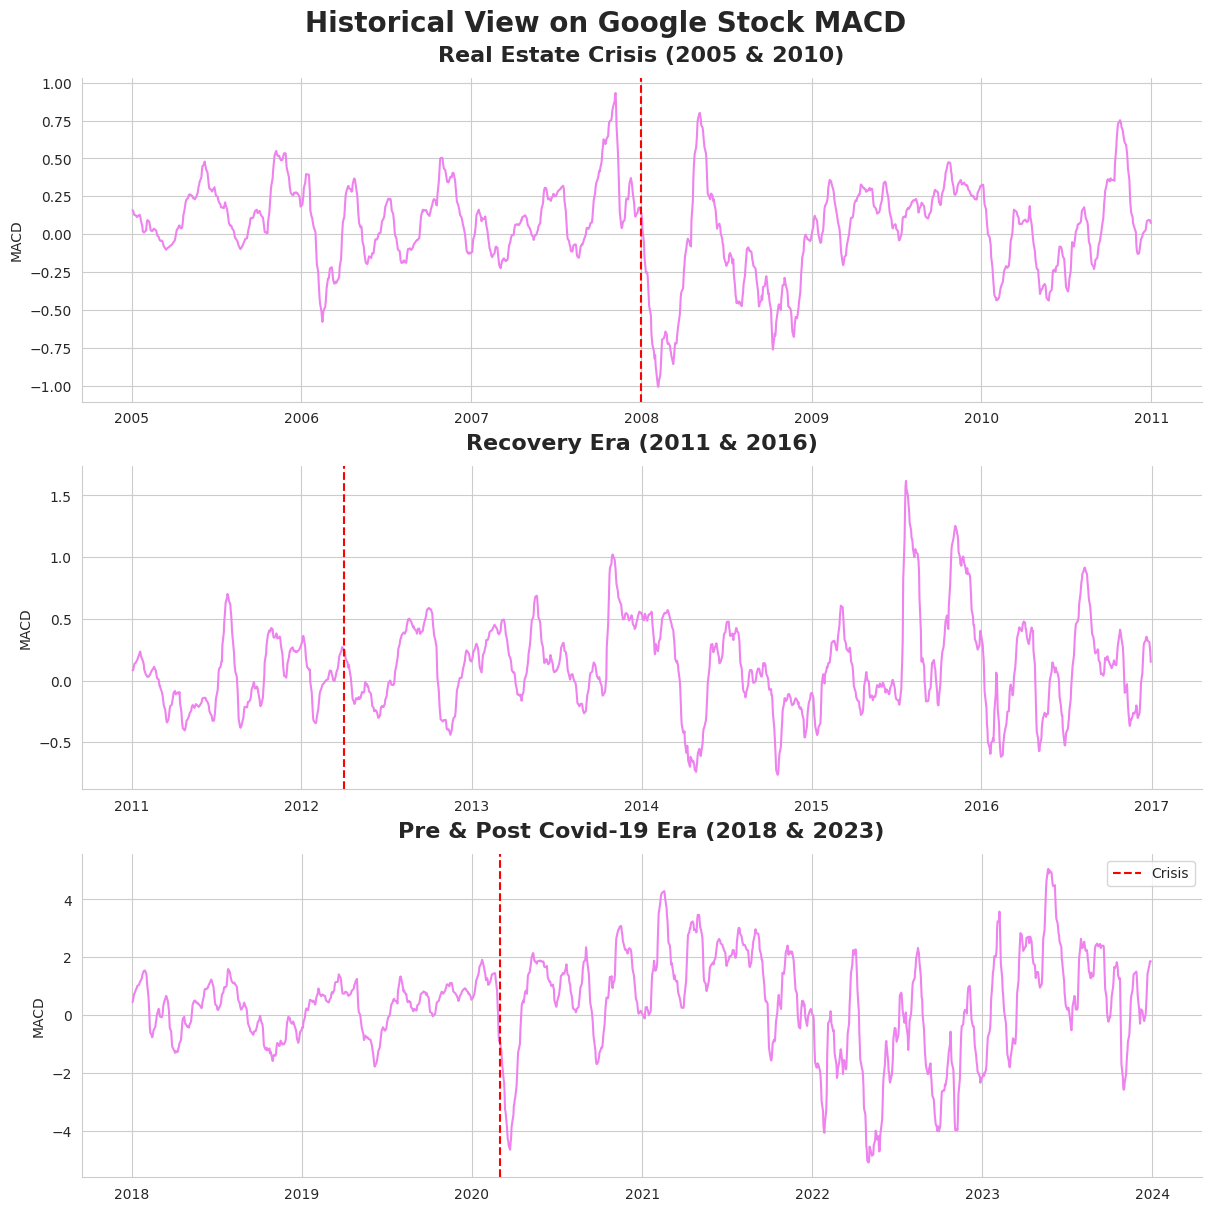

In [ ]:
# 创建一个包含 3 行 1 列的子图，并设置布局为 'constrained'
fig, axs = plt.subplots(3, 1, figsize=(12, 12), layout='constrained')

# 在第一个子图中绘制 2005 年到 2010 年的 MACD 指标，颜色为紫色
axs[0].plot(df_google.loc['2005':'2010', 'macd'], color='violet')
# 设置第一个子图的标题，表示房地产危机时期
axs[0].set_title('Real Estate Crisis (2005 & 2010)', fontsize=16, fontweight='bold', pad=12)
# 在第一个子图中添加垂直线，标记 2008 年，颜色为红色，虚线样式
axs[0].axvline(x=pd.to_datetime('2008-01'), color='red', linestyle='--', label='Year 2008')

# 在第二个子图中绘制 2011 年到 2016 年的 MACD 指标，颜色为紫色
axs[1].plot(df_google.loc['2011':'2016', 'macd'], color='violet')
# 设置第二个子图的标题，表示经济复苏时期
axs[1].set_title('Recovery Era (2011 & 2016)', fontsize=16, fontweight='bold', pad=12)
# 在第二个子图中添加垂直线，标记 2012 年，颜色为红色，虚线样式
axs[1].axvline(x=pd.to_datetime('2012-04'), color='red', linestyle='--', label='Year 2012')

# 在第三个子图中绘制 2018 年到 2023 年的 MACD 指标，颜色为紫色
axs[2].plot(df_google.loc['2018':'2023', 'macd'], color='violet')
# 设置第三个子图的标题，表示新冠疫情前后时期
axs[2].set_title('Pre & Post Covid-19 Era (2018 & 2023)', fontsize=16, fontweight='bold', pad=12)
# 在第三个子图中添加垂直线，标记 2020 年 3 月，颜色为红色，虚线样式
axs[2].axvline(x=pd.to_datetime('2020-03'), color='red', linestyle='--', label='Crisis')

# 设置总标题，表示谷歌股票 MACD 的历史视图
fig.suptitle('Historical View on Google Stock MACD', fontsize=20, fontweight='bold')

# 为所有子图设置 y 轴标签为 'MACD'
for ax in axs.flat:
    ax.set(ylabel='MACD')  # 设置 y 轴标签

# 去除边框
sns.despine()
# 显示图例
plt.legend()
# 显示图表
plt.show()

在全球危机（房地产危机和新冠疫情）期间，平衡交易量（OBV）均有所下降。

OBV 最剧烈的变动出现在 2008 年的金融危机期间（与新冠疫情相比）。

移动平均线收敛/背离指标（MACD）在两次危机中都严重下滑，其中以下滑幅度最大的是新冠疫情期间。因此，MACD 具有作为预测变量的良好潜力。

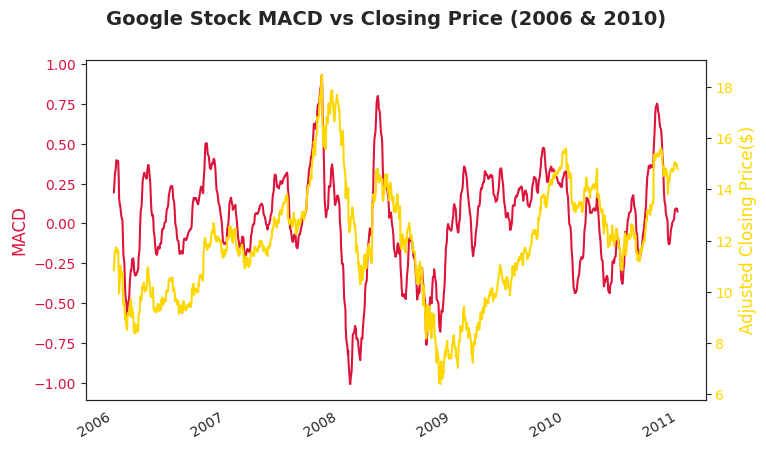

In [ ]:
# 设置 seaborn 样式为白色背景
sns.set_style('white')

# 创建一个图形和一个主坐标轴，设置图形大小
fig, ax1 = plt.subplots(figsize=(8, 5))
# 创建一个共享x轴的次坐标轴
ax2 = ax1.twinx()

# 在主坐标轴上绘制 MACD 指标，颜色为深红色，线宽为 1.5
ax1.plot(df_google.loc['2006': '2010', 'macd'], color='crimson', lw=1.5)
# 在次坐标轴上绘制调整后的收盘价，颜色为金色，线宽为 1.5
ax2.plot(df_google.loc['2006': '2010', 'adj_close'], color='gold', lw=1.5)

# 设置主坐标轴的 y 轴标签，颜色为深红色，字体大小为 12
ax1.set_ylabel('MACD', color='crimson', fontsize=12)
# 设置主坐标轴的 y 轴刻度标签颜色为深红色
ax1.tick_params(axis='y', labelcolor='crimson')

# 设置次坐标轴的 y 轴标签，颜色为金色，字体大小为 12
ax2.set_ylabel('Adjusted Closing Price($)', color='gold', fontsize=12)
# 设置次坐标轴的 y 轴刻度标签颜色为金色
ax2.tick_params(axis='y', labelcolor='gold')

# 设置图形的总标题，字体加粗，字体大小为 14
fig.suptitle('Google Stock MACD vs Closing Price (2006 & 2010)', fontweight='bold', fontsize=14)
# 自动格式化 x 轴日期标签，避免重叠
fig.autofmt_xdate()

# 显示图形
plt.show()

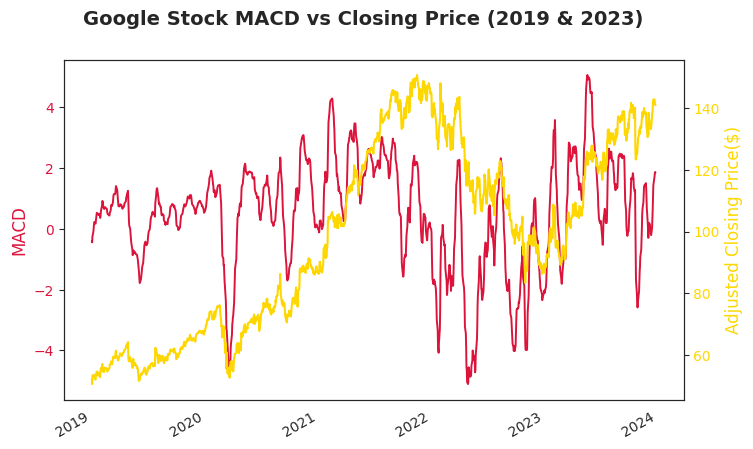

In [ ]:
sns.set_style('white')

fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

ax1.plot(df_google.loc['2019': '2023', 'macd'], color = 'crimson', lw = 1.4)
ax2.plot(df_google.loc['2019': '2023', 'adj_close'], color = 'gold', lw = 1.5)

ax1.set_ylabel('MACD', color = 'crimson', fontsize = 12)
ax1.tick_params(axis = 'y', labelcolor = 'crimson')

ax2.set_ylabel('Adjusted Closing Price($)', color = 'gold', fontsize = 12)
ax2.tick_params(axis = 'y', labelcolor = 'gold')

fig.suptitle('Google Stock MACD vs Closing Price (2019 & 2023)', fontweight = 'bold', fontsize = 14)
fig.autofmt_xdate()

plt.show()

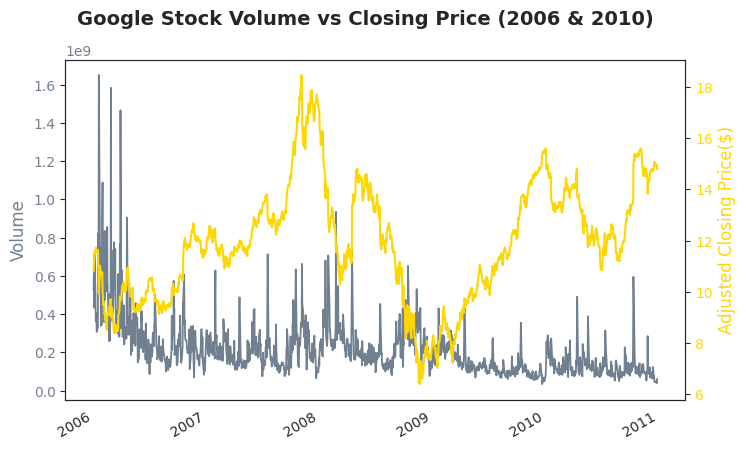

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

ax1.plot(df_google.loc['2006': '2010', 'volume'], color = 'slategray', lw = 1.3)
ax2.plot(df_google.loc['2006': '2010', 'adj_close'], color = 'gold', lw = 1.5)

ax1.set_ylabel('Volume', color = 'slategray', fontsize = 12)
ax1.tick_params(axis = 'y', labelcolor = 'slategray')

ax2.set_ylabel('Adjusted Closing Price($)', color = 'gold', fontsize = 12)
ax2.tick_params(axis = 'y', labelcolor = 'gold')

fig.suptitle('Google Stock Volume vs Closing Price (2006 & 2010)', fontweight = 'bold', fontsize = 14)
fig.autofmt_xdate()

plt.show()

这张图表展示了 **2006年至2011年间谷歌股票的交易量与调整后收盘价** 的变化趋势。从图中我们可以解读出以下信息：

**主要趋势:**

*   **股价 (Adjusted Closing Price): 整体呈上升趋势。**  虽然期间有波动，但从2006年初到2011年初，黄色的股价线总体上是向上走的，表明谷歌股票的价值在这段时间内是增长的。尤其是在2008年底到2010年期间，股价经历了一个显著的上涨。
*   **交易量 (Volume):  波动较大，但整体趋势不明显。**  灰色的交易量线波动非常剧烈，显示每天的交易量变化很大。  在2006年初和2008年底，交易量出现过几次高峰，但在其他时间则相对较低。总体来看，交易量并没有明显的上升或下降趋势，更多的是围绕一个水平线上下波动。

**股价与交易量的关系:**

*   **股价上涨可能伴随交易量增加，但并非绝对。**  例如，在2008年底到2010年初的股价快速上涨期间，交易量也出现了一定的上升，但并非同步且幅度不如股价上涨明显。 这可能表明，股价上涨更多是由市场对谷歌长期价值的认可驱动，而非短期的投机性交易。
*   **高交易量不一定预示股价上涨。**  例如，2006年初的交易量高峰并没有带来股价的立即上涨，反而股价在之后一段时间有所下跌。 这可能说明高交易量可能由多种因素引起，例如市场波动、重大新闻事件等，并不一定直接预示股价的走向。

**时间节点:**

*   **2008年底：**  图表中显示，2008年底是一个重要的时间节点。 股价在2008年底开始显著反弹并进入上升通道，而交易量也在此时出现一个高峰。 这可能与当时的全球经济形势或谷歌自身的发展状况有关。

**总结:**

总的来说，这张图表显示在2006年至2011年期间，**谷歌股票的长期价值是增长的，股价呈现上升趋势**。  **交易量则波动较大，与股价的短期波动可能存在一定关联，但长期趋势并不明显**。  股价的上涨可能更多反映了市场对谷歌公司长期发展的信心。

要更深入地解读这张图表，还需要结合当时的宏观经济环境、谷歌公司的发展历程以及行业动态等信息进行分析。

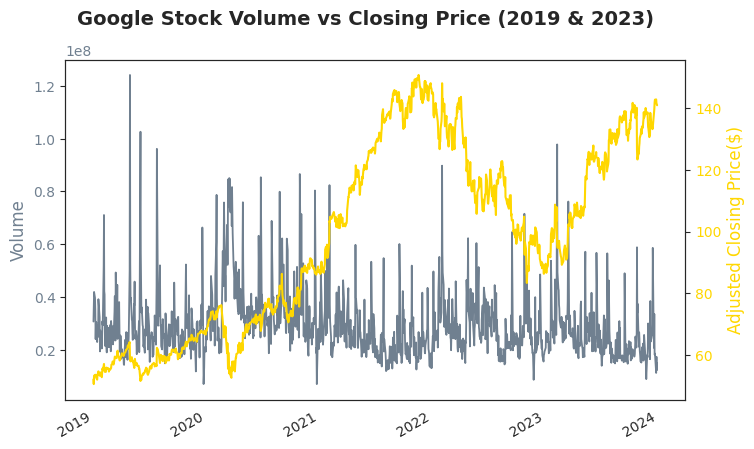

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

ax1.plot(df_google.loc['2019': '2023', 'volume'], color = 'slategray', lw = 1.3)
ax2.plot(df_google.loc['2019': '2023', 'adj_close'], color = 'gold', lw = 1.5)

ax1.set_ylabel('Volume', color = 'slategray', fontsize = 12)
ax1.tick_params(axis = 'y', labelcolor = 'slategray')

ax2.set_ylabel('Adjusted Closing Price($)', color = 'gold', fontsize = 12)
ax2.tick_params(axis = 'y', labelcolor = 'gold')

fig.suptitle('Google Stock Volume vs Closing Price (2019 & 2023)', fontweight = 'bold', fontsize = 14)
fig.autofmt_xdate()

plt.show()

这张图表展示了 **2019年至2024年间谷歌股票的交易量与调整后收盘价** 的变化趋势。从图中我们可以解读出以下信息：

**主要趋势:**

*   **股价 (Adjusted Closing Price):  先上升后下降，然后再次回升。** 黄色的股价线在2019年初至2021年底呈现明显的上升趋势，并在2021年底达到顶峰。 随后，在2022年经历了一段明显的下跌。 从2023年初开始，股价又开始逐渐回升，并在2023年底和2024年初保持相对较高的水平。
*   **交易量 (Volume):  波动性较大，但整体水平相对稳定。** 灰色的交易量线在整个期间都呈现出明显的波动性，每天的交易量都有起伏。  在2020年初和2022年初，交易量似乎出现过几次相对较高的峰值。 总体来看，交易量并没有明显的长期上升或下降趋势，更多的是在一个相对稳定的水平范围内波动。

**股价与交易量的关系:**

*   **股价上升期间，交易量有时会增加，但并非总是同步。** 例如，在2019年底至2021年底股价快速上涨期间，交易量也呈现出一定的上升趋势，尤其是在2020年初和2021年初。  然而，在股价下跌或平稳时期，交易量依然有波动，说明交易量受到多种因素的影响，不完全与股价的单向变动同步。
*   **交易量峰值可能与股价的波动相关。**  例如，在2020年初和2022年初，交易量都出现相对较高的峰值，而这两个时间点附近，股价也经历了一定的波动，这可能表明市场在股价关键变动时期交易活跃度增加。

**时间节点:**

*   **2020年初:**  图表中显示，2020年初交易量出现一个明显的峰值，可能与当时的全球事件（例如新冠疫情初期）引发的市场波动有关。
*   **2021年底 - 2022年:**  这段时间股价达到顶峰后开始显著下跌，可能反映了市场对谷歌股票价值的重新评估或宏观经济环境的变化。
*   **2023年初至今:**  股价开始回升，表明市场对谷歌股票的信心可能有所恢复。

**总结:**

总的来说，这张图表显示在2019年至2024年期间，**谷歌股票的价格经历了较为明显的周期性波动，先经历大幅上涨，然后下跌，之后又开始回升**。  **交易量则持续波动，但整体水平相对稳定，可能在股价波动剧烈时期出现交易活跃度增加的情况**。  股价的周期性波动可能与宏观经济环境、行业竞争以及公司自身发展等多种因素有关。

要更深入地解读这张图表，还需要结合当时的更详细的市场信息、公司财报和新闻事件等进行综合分析。

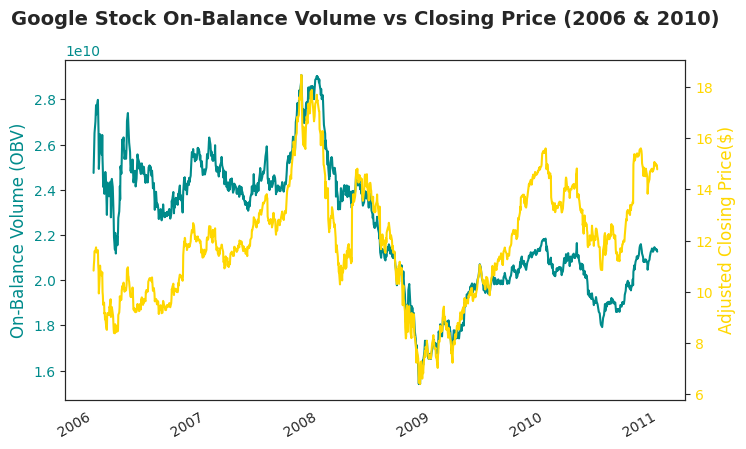

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

ax1.plot(df_google.loc['2006': '2010', 'obv'], color = 'darkcyan', lw = 1.5)
ax2.plot(df_google.loc['2006': '2010', 'adj_close'], color = 'gold', lw = 1.5)

ax1.set_ylabel('On-Balance Volume (OBV)', color = 'darkcyan', fontsize = 12)
ax1.tick_params(axis = 'y', labelcolor = 'darkcyan')

ax2.set_ylabel('Adjusted Closing Price($)', color = 'gold', fontsize = 12)
ax2.tick_params(axis = 'y', labelcolor = 'gold')

fig.suptitle('Google Stock On-Balance Volume vs Closing Price (2006 & 2010)', fontweight = 'bold', fontsize = 14)
fig.autofmt_xdate()

plt.show()

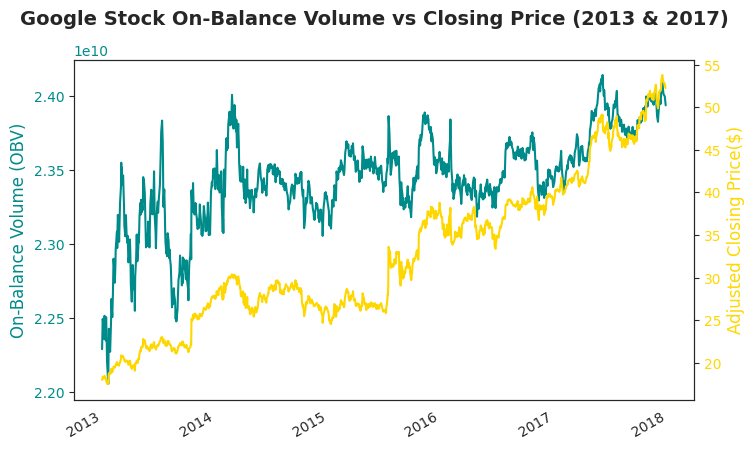

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

ax1.plot(df_google.loc['2013': '2017', 'obv'], color = 'darkcyan', lw = 1.5)
ax2.plot(df_google.loc['2013': '2017', 'adj_close'], color = 'gold', lw = 1.5)

ax1.set_ylabel('On-Balance Volume (OBV)', color = 'darkcyan', fontsize = 12)
ax1.tick_params(axis = 'y', labelcolor = 'darkcyan')

ax2.set_ylabel('Adjusted Closing Price($)', color = 'gold', fontsize = 12)
ax2.tick_params(axis = 'y', labelcolor = 'gold')

fig.suptitle('Google Stock On-Balance Volume vs Closing Price (2013 & 2017)', fontweight = 'bold', fontsize = 14)
fig.autofmt_xdate()

plt.show()

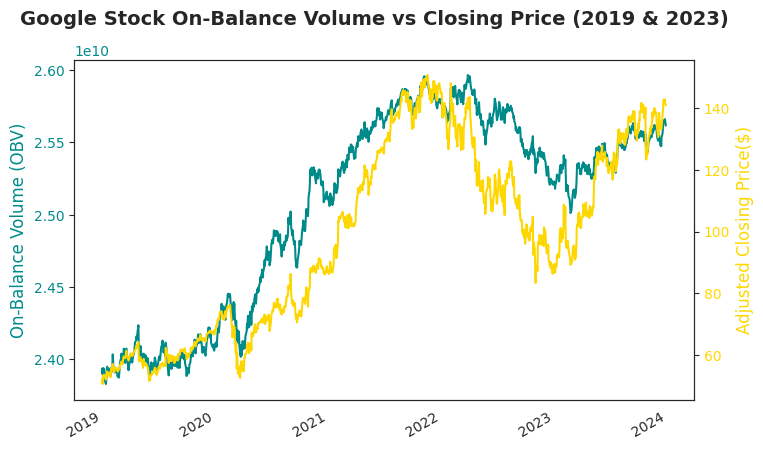

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
ax2 = ax1.twinx()

ax1.plot(df_google.loc['2019': '2023', 'obv'], color = 'darkcyan', lw = 1.5)
ax2.plot(df_google.loc['2019': '2023', 'adj_close'], color = 'gold', lw = 1.5)

ax1.set_ylabel('On-Balance Volume (OBV)', color = 'darkcyan', fontsize = 12)
ax1.tick_params(axis = 'y', labelcolor = 'darkcyan')

ax2.set_ylabel('Adjusted Closing Price($)', color = 'gold', fontsize = 12)
ax2.tick_params(axis = 'y', labelcolor = 'gold')

fig.suptitle('Google Stock On-Balance Volume vs Closing Price (2019 & 2023)', fontweight = 'bold', fontsize = 14)
fig.autofmt_xdate()

plt.show()

MACD 的走势与谷歌的收盘价走势相同；然而，这种现象在 2019-2023 年期间变得不那么明显。因此，MACD 有可能预测收盘价。

股票交易量和收盘价之间的关系难以解读，但股价的强劲峰值和下跌与交易量的急剧变化相吻合。

平衡交易量 (OBV) 的走势趋势与谷歌的收盘价相似，尤其是在 2006-2010 年和 2019-2023 年期间，这种相似性更为明显。与两个危机时期相比，OBV 和收盘价之间的趋势相似性要小得多。这表明 OBV 在动荡时期可能是一个关键的预测变量。

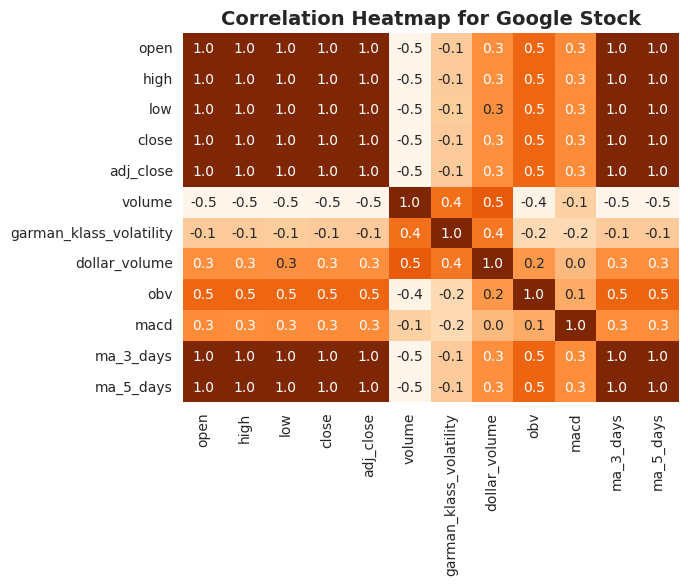

In [ ]:
sns.heatmap(df_google[['open', 'high', 'low', 'close', 'adj_close',
                 'volume', 'garman_klass_volatility', 'dollar_volume',
                 'obv', 'macd', 'ma_3_days', 'ma_5_days']].corr(),
            annot = True, cbar = False, cmap = 'Oranges', fmt = '.1f')

plt.title('Correlation Heatmap for Google Stock', fontsize = 14, fontweight = 'bold')
plt.show()

该模型的目标是预测谷歌的调整后收盘价。

调整后收盘价（adj_close）变量与交易量（volume）、美元交易量（dollar_volume）、平衡交易量（obv）、MACD 指标（macd）和 3 日移动平均线（ma_3_days）高度相关。因此，这些变量将用作模型的预测变量。

附注：相关性是一种统计量，用于衡量两个变量之间相互变动的程度，其值必须介于 -1.0 和 +1.0 之间。相关性衡量的是关联性，但并不表示变量之间存在因果关系。

In [ ]:
google_features = ['adj_close', 'volume', 'dollar_volume', 'obv', 'ma_3_days', 'macd'] # 定义要使用的特征列名列表
google_dset = df_google.filter(google_features) # 从df_google DataFrame中筛选出指定的特征列
google_dset.dropna(axis = 0, inplace = True) # 删除包含任何NaN值的行，并直接在原DataFrame上修改
print(google_dset.shape) # 打印处理后的DataFrame的形状（行数，列数）

q_80 = int(len(google_dset) * 0.8) # 计算数据集长度的80%位置，用于划分训练集和测试集

google_train = google_dset[:q_80] # 将数据集的前80%作为训练集
google_test = google_dset[q_80:] # 将数据集的后20%作为测试集

google_train.shape, google_test.shape # 打印训练集和测试集的形状

scaler = MinMaxScaler(feature_range = (0, 1)) # 初始化一个MinMaxScaler对象，用于将数据缩放到0到1的范围内
google_train_scaled = scaler.fit_transform(google_train) # 使用训练集数据拟合scaler，并对训练集进行缩放
google_test_scaled = scaler.transform(google_test) # 使用训练集拟合的scaler对测试集进行缩放，避免数据泄露
google_train_scaled # 显示缩放后的训练集数据

def createXY(dataset, n_past): # 定义一个函数，用于创建时间序列数据的X和Y
    dataX = [] # 初始化一个空列表，用于存储输入特征序列
    dataY = [] # 初始化一个空列表，用于存储目标值
    for i in range(n_past, len(dataset)): # 遍历数据集，从n_past位置开始
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]]) # 将当前位置前n_past个时间步的数据作为输入特征序列添加到dataX
        dataY.append(dataset[i,0]) # 将当前位置的第一个特征值作为目标值添加到dataY
    return np.array(dataX),np.array(dataY) # 将dataX和dataY转换为NumPy数组并返回

trainX, trainY = createXY(google_train_scaled, 21) # 使用训练集缩放后的数据和n_past=21创建训练集的X和Y
testX, testY = createXY(google_test_scaled, 21) # 使用测试集缩放后的数据和n_past=21创建测试集的X和Y

(5032, 6)


In [ ]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((4004, 21, 6), (4004,), (986, 21, 6), (986,))

In [ ]:
import sklearn
import scikeras

print(f"scikit-learn version: {sklearn.__version__}")
print(f"scikeras version: {scikeras.__version__}")

scikit-learn version: 1.6.1
scikeras version: 0.13.0


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
print(keras.__version__)

2.18.0
3.8.0


由于scikit-learn版本过高，移除了某些模块，导致scikeras的兼容性问题。不过用户希望保持现有版本，所以可能需要调整代码而不是降级库。

可以采用‌Keras原生调参接口‌完全脱离scikit-learn，可规避AttributeError: 'super' object has no attribute '\_\_sklearn_tags\_\_'错误‌，关键修改点在于使用TensorFlow官方封装器并简化参数传递逻辑‌。

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, Adadelta
from scikeras.wrappers import KerasRegressor
from sklearn.base import BaseEstimator, RegressorMixin

# 定义模型构建函数
def build_model(optimizer='adam', **kwargs):
    # 构建LSTM模型，支持动态传递超参数
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=(21, 6)),  # LSTM层，100个神经元，返回序列，输入形状(21, 6)
        LSTM(50),  # LSTM层，50个神经元
        Dropout(0.1),  # Dropout层，防止过拟合
        Dense(1)  # 输出层，输出一个值
    ])

    # 获取学习率，默认为0.001
    learning_rate = kwargs.get('learning_rate', 0.001)

    # 选择优化器
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = Adadelta(learning_rate=learning_rate)

    # 编译模型，使用均方误差作为损失函数
    model.compile(loss='mse', optimizer=opt)
    return model

# 自定义KerasRegressor包装器
class MyKerasRegressor(KerasRegressor, BaseEstimator, RegressorMixin):
    # 初始化父类
    def __init__(self, model, **kwargs):
        super().__init__(model=model, **kwargs)

    # 定义sklearn标签
    def __sklearn_tags__(self):
        return {'allow_nan': False, 'requires_y': True}  # 不允许NaN值，需要目标值y

# 创建模型实例
model = MyKerasRegressor(
    model=build_model,  # 使用自定义的模型构建函数
    optimizer='adam',  # 使用Adam优化器
    optimizer__learning_rate=0.001,  # 设置学习率
    loss='mse',  # 使用均方误差作为损失函数
    verbose=1  # 显示训练过程
)

# 定义超参数搜索空间
param_grid = {
    'optimizer': ['adam', 'adadelta'],  # 优化器选项
    'batch_size': [12, 20, 24],  # 批次大小选项
    'epochs': [15, 20],  # 训练轮数选项
    'optimizer__learning_rate': [0.001, 0.01]  # 学习率选项
}

# 执行网格搜索
grid_search = GridSearchCV(
    estimator=model,  # 使用定义的模型
    param_grid=param_grid,  # 使用定义的超参数网格
    cv=4,  # 使用4折交叉验证
    n_jobs=-1,  # 使用所有可用的CPU核心
    verbose=2  # 设置详细程度为2
)


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 定义手动网格搜索函数
def manual_grid_search():
    # 将训练数据拆分为训练集和验证集
    global trainX, trainY, valX, valY  # 声明valX和valY为全局变量

    trainX, valX, trainY, valY = train_test_split(
        trainX, trainY, test_size=0.2, random_state=42  # 将训练数据拆分为训练集和验证集，验证集占比20%
    )

    best_score = float('inf')  # 初始化最佳分数为无穷大
    best_model = None  # 初始化最佳模型为None

    for lr in [0.001, 0.01]:  # 遍历学习率
        for batch in [12, 20, 24]:  # 遍历批次大小
            model = build_model(learning_rate=lr)  # 使用当前学习率构建模型

            # 定义模型保存路径
            model_path = f"best_model_lr_{lr}_batch_{batch}.h5"

            # 添加ModelCheckpoint回调函数，保存最佳模型
            checkpoint = ModelCheckpoint(model_path, monitor='val_loss',
                                        save_best_only=True, mode='min', verbose=1)

            model.fit(
                trainX, trainY,
                batch_size=batch,
                epochs=20,
                validation_split=0.2,  # 使用20%的数据作为验证集
                callbacks=[EarlyStopping(patience=3), checkpoint],  # 添加早停和模型保存回调
                verbose=0  # 设置verbose为0，不显示训练过程
            )

            val_loss = model.evaluate(valX, valY)  # 评估模型在验证集上的损失

            if val_loss < best_score:  # 如果当前损失小于最佳分数
                best_score = val_loss  # 更新最佳分数
                best_params = {'lr': lr, 'batch': batch}  # 保存最佳参数
                best_model = model  # 保存最佳模型

    # 保存最佳模型到指定路径
    best_model.save("1st_best_Google-LSTM-Model.h5")
    print("最佳模型已保存到 1st_best_Google-LSTM-Model.h5")

    return best_params


# 调用手动网格搜索函数
manual_grid_search()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss improved from inf to 0.00029, saving model to best_model_lr_0.001_batch_12.h5



Epoch 2: val_loss did not improve from 0.00029

Epoch 3: val_loss did not improve from 0.00029

Epoch 4: val_loss improved from 0.00029 to 0.00019, saving model to best_model_lr_0.001_batch_12.h5



Epoch 5: val_loss improved from 0.00019 to 0.00017, saving model to best_model_lr_0.001_batch_12.h5



Epoch 6: val_loss did not improve from 0.00017

Epoch 7: val_loss did not improve from 0.00017

Epoch 8: val_loss did not improve from 0.00017
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5055e-04

Epoch 1: val_loss improved from inf to 0.00033, saving model to best_model_lr_0.001_batch_20.h5



Epoch 2: val_loss did not improve from 0.00033

Epoch 3: val_loss did not improve from 0.00033

Epoch 4: val_loss did not improve from 0.00033
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9945e-04

Epoch 1: val_loss improved from inf to 0.00030, saving model to best_model_lr_0.001_batch_24.h5



Epoch 2: val_loss did not improve from 0.00030

Epoch 3: val_loss did not improve from 0.00030

Epoch 4: val_loss improved from 0.00030 to 0.00023, saving model to best_model_lr_0.001_batch_24.h5



Epoch 5: val_loss improved from 0.00023 to 0.00023, saving model to best_model_lr_0.001_batch_24.h5



Epoch 6: val_loss did not improve from 0.00023

Epoch 7: val_loss did not improve from 0.00023

Epoch 8: val_loss did not improve from 0.00023
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9158e-04

Epoch 1: val_loss improved from inf to 0.00140, saving model to best_model_lr_0.01_batch_12.h5



Epoch 2: val_loss improved from 0.00140 to 0.00025, saving model to best_model_lr_0.01_batch_12.h5



Epoch 3: val_loss did not improve from 0.00025

Epoch 4: val_loss did not improve from 0.00025

Epoch 5: val_loss did not improve from 0.00025
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5979e-04

Epoch 1: val_loss improved from inf to 0.00079, saving model to best_model_lr_0.01_batch_20.h5



Epoch 2: val_loss improved from 0.00079 to 0.00025, saving model to best_model_lr_0.01_batch_20.h5



Epoch 3: val_loss did not improve from 0.00025

Epoch 4: val_loss improved from 0.00025 to 0.00025, saving model to best_model_lr_0.01_batch_20.h5



Epoch 5: val_loss did not improve from 0.00025

Epoch 6: val_loss improved from 0.00025 to 0.00019, saving model to best_model_lr_0.01_batch_20.h5



Epoch 7: val_loss did not improve from 0.00019

Epoch 8: val_loss did not improve from 0.00019

Epoch 9: val_loss improved from 0.00019 to 0.00018, saving model to best_model_lr_0.01_batch_20.h5



Epoch 10: val_loss improved from 0.00018 to 0.00013, saving model to best_model_lr_0.01_batch_20.h5



Epoch 11: val_loss did not improve from 0.00013

Epoch 12: val_loss did not improve from 0.00013

Epoch 13: val_loss did not improve from 0.00013
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4035e-04

Epoch 1: val_loss improved from inf to 0.00036, saving model to best_model_lr_0.01_batch_24.h5



Epoch 2: val_loss improved from 0.00036 to 0.00023, saving model to best_model_lr_0.01_batch_24.h5



Epoch 3: val_loss did not improve from 0.00023

Epoch 4: val_loss did not improve from 0.00023

Epoch 5: val_loss improved from 0.00023 to 0.00017, saving model to best_model_lr_0.01_batch_24.h5



Epoch 6: val_loss did not improve from 0.00017

Epoch 7: val_loss did not improve from 0.00017

Epoch 8: val_loss improved from 0.00017 to 0.00013, saving model to best_model_lr_0.01_batch_24.h5



Epoch 9: val_loss did not improve from 0.00013

Epoch 10: val_loss did not improve from 0.00013

Epoch 11: val_loss did not improve from 0.00013
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1564e-04


最佳模型已保存到 1st_best_Google-LSTM-Model.h5


{'lr': 0.01, 'batch': 24}

In [ ]:
# 从'best_Google-LSTM-Model.h5'文件中加载模型，并指定'mse'为自定义对象
google_model_1st = tf.keras.models.load_model('1st_best_Google-LSTM-Model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

# 打印模型的摘要信息，包括层结构、输出形状和参数数量
google_model_1st.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 21, 100)             │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,053 (285.37 KB)

 Trainable params: 73,051 (285.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Prediction Shape : (986, 1)


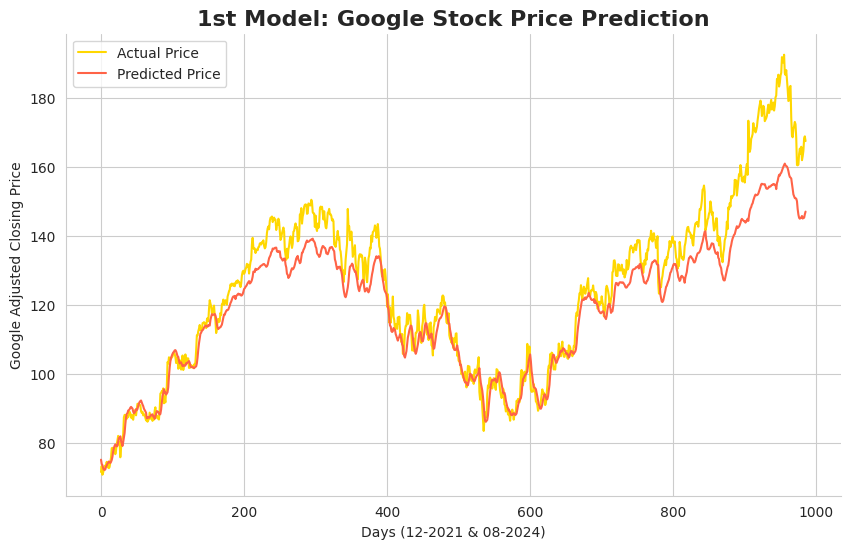

MAE = 6.3445 
MAPE = 0.0455 
R2 score = 0.8782


In [ ]:
# 生成预测并检查其大小
prediction_1st = google_model_1st.predict(testX) # 使用训练好的模型对测试集进行预测

print('Prediction Shape :', prediction_1st.shape) # 打印预测结果的形状

# 更改形状以使用逆变换
prediction_array = np.repeat(prediction_1st, 6, axis = -1) # 将预测结果在最后一个轴上重复6次，以便进行逆变换
original_array = np.repeat(testY, 6, axis = -1) # 将测试集的目标值在最后一个轴上重复6次，以便进行逆变换

# 我们只需要逆变换后的adj_close（第一列），在末尾使用[:,0]
preds = scaler.inverse_transform(np.reshape(prediction_array,(len(prediction_1st), 6)))[:,0] # 对预测结果进行逆变换，并提取第一列（adj_close）
preds1 = preds
original = scaler.inverse_transform(np.reshape(original_array,(len(testY), 6)))[:,0] # 对测试集的目标值进行逆变换，并提取第一列（adj_close）
preds.shape, original.shape # 打印逆变换后的预测结果和目标值的形状

# 可视化真实收盘价和预测收盘价，以评估模型预测性能
plt.figure(figsize = (10, 6)) # 创建一个大小为10x6的图形
sns.set_style('whitegrid') # 设置seaborn的样式为白色网格

plt.plot(original, color = 'gold', label = 'Actual Price') # 绘制真实收盘价，颜色为金色，标签为'Actual Price'
plt.plot(preds, color = 'tomato', label = 'Predicted Price') # 绘制预测收盘价，颜色为番茄色，标签为'Predicted Price'
plt.xlabel('Days (12-2021 & 08-2024)') # 设置x轴标签
plt.ylabel('Google Adjusted Closing Price') # 设置y轴标签
plt.title('1st Model: Google Stock Price Prediction', fontweight = 'bold', fontsize = 16) # 设置图形标题，加粗字体，字体大小为16

plt.legend() # 显示图例
sns.despine() # 移除图形的边框
plt.show() # 显示图形

# 计算预测模型的常用评估指标
mae_1 = round(mean_absolute_error(original, preds), 4) # 计算平均绝对误差（MAE），保留4位小数
mape_1 = round(mean_absolute_percentage_error(original, preds), 4) # 计算平均绝对百分比误差（MAPE），保留4位小数
R2_1 = round(r2_score(original, preds), 4) # 计算R2分数，保留4位小数

print('MAE =', mae_1, '\nMAPE =', mape_1, '\nR2 score =', R2_1) # 打印评估指标

图表（见上文）显示模型预测结果是足够的，然而，在 2024 年期间，实际值和预测值之间的差异变得剧烈。

该模型学习了潜在的模式和关系；因此，预测价格线极大地遵循了真实数据的趋势。

评估指标也表明该模型是强劲的。

尽管如此，由于 2022 年和 2024 年的预测差异，该模型将被进一步改进。

In [ ]:
# 定义模型构建函数
def build_model(optimizer='adam', **kwargs):
    # 构建LSTM模型，支持动态传递超参数
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(21, 6)),  # LSTM层，128个神经元，返回序列，输入形状(21, 6)
        LSTM(64),  # LSTM层，64个神经元
        Dense(10),  # 输出层，输出10个值
        Dense(1)  # 输出层，输出1个值
    ])

    # 获取学习率，默认为0.001
    learning_rate = kwargs.get('learning_rate', 0.001)

    # 选择优化器
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = Adadelta(learning_rate=learning_rate)

    # 编译模型，使用均方误差作为损失函数
    model.compile(loss='mse', optimizer=opt)
    return model



# 自定义KerasRegressor包装器
class MyKerasRegressor(KerasRegressor, BaseEstimator, RegressorMixin):
    # 初始化父类
    def __init__(self, model, **kwargs):
        super().__init__(model=model, **kwargs)

    # 定义sklearn标签
    def __sklearn_tags__(self):
        return {'allow_nan': False, 'requires_y': True}  # 不允许NaN值，需要目标值y

# 创建模型实例
model = MyKerasRegressor(
    model=build_model,  # 使用自定义的模型构建函数
    optimizer='adam',  # 使用Adam优化器
    optimizer__learning_rate=0.001,  # 设置学习率
    loss='mse',  # 使用均方误差作为损失函数
    verbose=1  # 显示训练过程
)




# 定义手动网格搜索函数
def manual_grid_search():
    # 将训练数据拆分为训练集和验证集
    global trainX, trainY, valX, valY  # 声明valX和valY为全局变量

    trainX, valX, trainY, valY = train_test_split(
        trainX, trainY, test_size=0.2, random_state=42  # 将训练数据拆分为训练集和验证集，验证集占比20%
    )

    best_score = float('inf')  # 初始化最佳分数为无穷大
    best_model = None  # 初始化最佳模型为None

    for lr in [0.001, 0.01]:  # 遍历学习率
        for batch in [12, 20, 24]:  # 遍历批次大小
            model = build_model(learning_rate=lr)  # 使用当前学习率构建模型

            # 定义模型保存路径
            model_path = f"best_model_lr_{lr}_batch_{batch}.h5"

            # 添加ModelCheckpoint回调函数，保存最佳模型
            checkpoint = ModelCheckpoint(model_path, monitor='val_loss',
                                        save_best_only=True, mode='min', verbose=1)

            model.fit(
                trainX, trainY,
                batch_size=batch,
                epochs=30,
                validation_split=0.2,  # 使用20%的数据作为验证集
                callbacks=[EarlyStopping(patience=3), checkpoint],  # 添加早停和模型保存回调
                verbose=0  # 设置verbose为0，不显示训练过程
            )

            val_loss = model.evaluate(valX, valY)  # 评估模型在验证集上的损失

            if val_loss < best_score:  # 如果当前损失小于最佳分数
                best_score = val_loss  # 更新最佳分数
                best_params = {'lr': lr, 'batch': batch}  # 保存最佳参数
                best_model = model  # 保存最佳模型

    # 保存最佳模型到指定路径
    best_model.save("2nd_best_Google-LSTM-Model.h5")
    print("最佳模型已保存到 2nd_best_Google-LSTM-Model.h5")

    return best_params


# 调用手动网格搜索函数
manual_grid_search()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: val_loss improved from inf to 0.00024, saving model to best_model_lr_0.001_batch_12.h5



Epoch 2: val_loss improved from 0.00024 to 0.00018, saving model to best_model_lr_0.001_batch_12.h5



Epoch 3: val_loss improved from 0.00018 to 0.00016, saving model to best_model_lr_0.001_batch_12.h5



Epoch 4: val_loss improved from 0.00016 to 0.00016, saving model to best_model_lr_0.001_batch_12.h5



Epoch 5: val_loss improved from 0.00016 to 0.00015, saving model to best_model_lr_0.001_batch_12.h5



Epoch 6: val_loss improved from 0.00015 to 0.00015, saving model to best_model_lr_0.001_batch_12.h5



Epoch 7: val_loss improved from 0.00015 to 0.00015, saving model to best_model_lr_0.001_batch_12.h5



Epoch 8: val_loss improved from 0.00015 to 0.00014, saving model to best_model_lr_0.001_batch_12.h5



Epoch 9: val_loss improved from 0.00014 to 0.00013, saving model to best_model_lr_0.001_batch_12.h5



Epoch 10: val_loss improved from 0.00013 to 0.00012, saving model to best_model_lr_0.001_batch_12.h5



Epoch 11: val_loss improved from 0.00012 to 0.00012, saving model to best_model_lr_0.001_batch_12.h5



Epoch 12: val_loss improved from 0.00012 to 0.00011, saving model to best_model_lr_0.001_batch_12.h5



Epoch 13: val_loss did not improve from 0.00011

Epoch 14: val_loss did not improve from 0.00011

Epoch 15: val_loss did not improve from 0.00011
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1881e-04

Epoch 1: val_loss improved from inf to 0.00025, saving model to best_model_lr_0.001_batch_20.h5



Epoch 2: val_loss improved from 0.00025 to 0.00019, saving model to best_model_lr_0.001_batch_20.h5



Epoch 3: val_loss improved from 0.00019 to 0.00017, saving model to best_model_lr_0.001_batch_20.h5



Epoch 4: val_loss improved from 0.00017 to 0.00016, saving model to best_model_lr_0.001_batch_20.h5



Epoch 5: val_loss improved from 0.00016 to 0.00014, saving model to best_model_lr_0.001_batch_20.h5



Epoch 6: val_loss improved from 0.00014 to 0.00014, saving model to best_model_lr_0.001_batch_20.h5



Epoch 7: val_loss did not improve from 0.00014

Epoch 8: val_loss did not improve from 0.00014

Epoch 9: val_loss improved from 0.00014 to 0.00014, saving model to best_model_lr_0.001_batch_20.h5



Epoch 10: val_loss improved from 0.00014 to 0.00013, saving model to best_model_lr_0.001_batch_20.h5



Epoch 11: val_loss improved from 0.00013 to 0.00012, saving model to best_model_lr_0.001_batch_20.h5



Epoch 12: val_loss improved from 0.00012 to 0.00011, saving model to best_model_lr_0.001_batch_20.h5



Epoch 13: val_loss improved from 0.00011 to 0.00011, saving model to best_model_lr_0.001_batch_20.h5



Epoch 14: val_loss improved from 0.00011 to 0.00010, saving model to best_model_lr_0.001_batch_20.h5



Epoch 15: val_loss improved from 0.00010 to 0.00010, saving model to best_model_lr_0.001_batch_20.h5



Epoch 16: val_loss improved from 0.00010 to 0.00009, saving model to best_model_lr_0.001_batch_20.h5



Epoch 17: val_loss improved from 0.00009 to 0.00009, saving model to best_model_lr_0.001_batch_20.h5



Epoch 18: val_loss improved from 0.00009 to 0.00009, saving model to best_model_lr_0.001_batch_20.h5



Epoch 19: val_loss improved from 0.00009 to 0.00009, saving model to best_model_lr_0.001_batch_20.h5



Epoch 20: val_loss did not improve from 0.00009

Epoch 21: val_loss did not improve from 0.00009

Epoch 22: val_loss did not improve from 0.00009
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0244e-04

Epoch 1: val_loss improved from inf to 0.00027, saving model to best_model_lr_0.001_batch_24.h5



Epoch 2: val_loss improved from 0.00027 to 0.00023, saving model to best_model_lr_0.001_batch_24.h5



Epoch 3: val_loss improved from 0.00023 to 0.00023, saving model to best_model_lr_0.001_batch_24.h5



Epoch 4: val_loss did not improve from 0.00023

Epoch 5: val_loss did not improve from 0.00023

Epoch 6: val_loss improved from 0.00023 to 0.00021, saving model to best_model_lr_0.001_batch_24.h5



Epoch 7: val_loss improved from 0.00021 to 0.00020, saving model to best_model_lr_0.001_batch_24.h5



Epoch 8: val_loss improved from 0.00020 to 0.00018, saving model to best_model_lr_0.001_batch_24.h5



Epoch 9: val_loss improved from 0.00018 to 0.00017, saving model to best_model_lr_0.001_batch_24.h5



Epoch 10: val_loss improved from 0.00017 to 0.00017, saving model to best_model_lr_0.001_batch_24.h5



Epoch 11: val_loss improved from 0.00017 to 0.00017, saving model to best_model_lr_0.001_batch_24.h5



Epoch 12: val_loss improved from 0.00017 to 0.00017, saving model to best_model_lr_0.001_batch_24.h5



Epoch 13: val_loss improved from 0.00017 to 0.00016, saving model to best_model_lr_0.001_batch_24.h5



Epoch 14: val_loss improved from 0.00016 to 0.00016, saving model to best_model_lr_0.001_batch_24.h5



Epoch 15: val_loss improved from 0.00016 to 0.00015, saving model to best_model_lr_0.001_batch_24.h5



Epoch 16: val_loss improved from 0.00015 to 0.00015, saving model to best_model_lr_0.001_batch_24.h5



Epoch 17: val_loss improved from 0.00015 to 0.00015, saving model to best_model_lr_0.001_batch_24.h5



Epoch 18: val_loss improved from 0.00015 to 0.00014, saving model to best_model_lr_0.001_batch_24.h5



Epoch 19: val_loss improved from 0.00014 to 0.00014, saving model to best_model_lr_0.001_batch_24.h5



Epoch 20: val_loss improved from 0.00014 to 0.00014, saving model to best_model_lr_0.001_batch_24.h5



Epoch 21: val_loss improved from 0.00014 to 0.00013, saving model to best_model_lr_0.001_batch_24.h5



Epoch 22: val_loss improved from 0.00013 to 0.00013, saving model to best_model_lr_0.001_batch_24.h5



Epoch 23: val_loss improved from 0.00013 to 0.00013, saving model to best_model_lr_0.001_batch_24.h5



Epoch 24: val_loss improved from 0.00013 to 0.00013, saving model to best_model_lr_0.001_batch_24.h5



Epoch 25: val_loss improved from 0.00013 to 0.00013, saving model to best_model_lr_0.001_batch_24.h5



Epoch 26: val_loss improved from 0.00013 to 0.00013, saving model to best_model_lr_0.001_batch_24.h5



Epoch 27: val_loss improved from 0.00013 to 0.00012, saving model to best_model_lr_0.001_batch_24.h5



Epoch 28: val_loss improved from 0.00012 to 0.00012, saving model to best_model_lr_0.001_batch_24.h5



Epoch 29: val_loss improved from 0.00012 to 0.00012, saving model to best_model_lr_0.001_batch_24.h5



Epoch 30: val_loss improved from 0.00012 to 0.00012, saving model to best_model_lr_0.001_batch_24.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3291e-04

Epoch 1: val_loss improved from inf to 0.00022, saving model to best_model_lr_0.01_batch_12.h5



Epoch 2: val_loss did not improve from 0.00022

Epoch 3: val_loss improved from 0.00022 to 0.00015, saving model to best_model_lr_0.01_batch_12.h5



Epoch 4: val_loss improved from 0.00015 to 0.00012, saving model to best_model_lr_0.01_batch_12.h5



Epoch 5: val_loss improved from 0.00012 to 0.00011, saving model to best_model_lr_0.01_batch_12.h5



Epoch 6: val_loss improved from 0.00011 to 0.00011, saving model to best_model_lr_0.01_batch_12.h5



Epoch 7: val_loss did not improve from 0.00011

Epoch 8: val_loss did not improve from 0.00011

Epoch 9: val_loss did not improve from 0.00011
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2925e-04

Epoch 1: val_loss improved from inf to 0.00033, saving model to best_model_lr_0.01_batch_20.h5



Epoch 2: val_loss improved from 0.00033 to 0.00026, saving model to best_model_lr_0.01_batch_20.h5



Epoch 3: val_loss did not improve from 0.00026

Epoch 4: val_loss did not improve from 0.00026

Epoch 5: val_loss did not improve from 0.00026
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0483e-04

Epoch 1: val_loss improved from inf to 0.00030, saving model to best_model_lr_0.01_batch_24.h5



Epoch 2: val_loss improved from 0.00030 to 0.00021, saving model to best_model_lr_0.01_batch_24.h5



Epoch 3: val_loss improved from 0.00021 to 0.00020, saving model to best_model_lr_0.01_batch_24.h5



Epoch 4: val_loss improved from 0.00020 to 0.00018, saving model to best_model_lr_0.01_batch_24.h5



Epoch 5: val_loss improved from 0.00018 to 0.00016, saving model to best_model_lr_0.01_batch_24.h5



Epoch 6: val_loss improved from 0.00016 to 0.00014, saving model to best_model_lr_0.01_batch_24.h5



Epoch 7: val_loss improved from 0.00014 to 0.00013, saving model to best_model_lr_0.01_batch_24.h5



Epoch 8: val_loss improved from 0.00013 to 0.00012, saving model to best_model_lr_0.01_batch_24.h5



Epoch 9: val_loss improved from 0.00012 to 0.00011, saving model to best_model_lr_0.01_batch_24.h5



Epoch 10: val_loss improved from 0.00011 to 0.00010, saving model to best_model_lr_0.01_batch_24.h5



Epoch 11: val_loss improved from 0.00010 to 0.00010, saving model to best_model_lr_0.01_batch_24.h5



Epoch 12: val_loss improved from 0.00010 to 0.00009, saving model to best_model_lr_0.01_batch_24.h5



Epoch 13: val_loss improved from 0.00009 to 0.00009, saving model to best_model_lr_0.01_batch_24.h5



Epoch 14: val_loss did not improve from 0.00009

Epoch 15: val_loss did not improve from 0.00009

Epoch 16: val_loss did not improve from 0.00009
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1586e-04


最佳模型已保存到 2nd_best_Google-LSTM-Model.h5


{'lr': 0.001, 'batch': 20}

In [ ]:
# 从'best_Google-LSTM-Model.h5'文件中加载模型，并指定'mse'为自定义对象
google_model_2nd = tf.keras.models.load_model('2nd_best_Google-LSTM-Model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

# 打印模型的摘要信息，包括层结构、输出形状和参数数量
google_model_2nd.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 21, 128)             │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,191 (465.59 KB)

 Trainable params: 119,189 (465.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Prediction Shape : (986, 1)


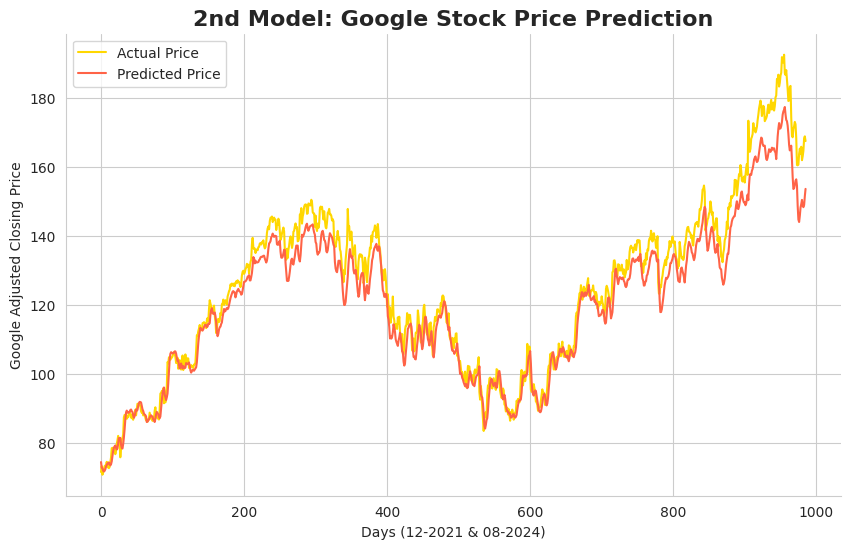

MAE = 4.6781 
MAPE = 0.0348 
R2 score = 0.9421


In [ ]:
# 生成预测并检查其大小
prediction_2nd = google_model_2nd.predict(testX) # 使用训练好的模型对测试集进行预测

print('Prediction Shape :', prediction_2nd.shape) # 打印预测结果的形状

# 更改形状以使用逆变换
prediction_array = np.repeat(prediction_2nd, 6, axis = -1) # 将预测结果在最后一个轴上重复6次，以便进行逆变换
original_array = np.repeat(testY, 6, axis = -1) # 将测试集的目标值在最后一个轴上重复6次，以便进行逆变换

# 我们只需要逆变换后的adj_close（第一列），在末尾使用[:,0]
preds = scaler.inverse_transform(np.reshape(prediction_array,(len(prediction_2nd), 6)))[:,0] # 对预测结果进行逆变换，并提取第一列（adj_close）
preds2 = preds
original = scaler.inverse_transform(np.reshape(original_array,(len(testY), 6)))[:,0] # 对测试集的目标值进行逆变换，并提取第一列（adj_close）
preds.shape, original.shape # 打印逆变换后的预测结果和目标值的形状

# 可视化真实收盘价和预测收盘价，以评估模型预测性能
plt.figure(figsize = (10, 6)) # 创建一个大小为10x6的图形
sns.set_style('whitegrid') # 设置seaborn的样式为白色网格

plt.plot(original, color = 'gold', label = 'Actual Price') # 绘制真实收盘价，颜色为金色，标签为'Actual Price'
plt.plot(preds, color = 'tomato', label = 'Predicted Price') # 绘制预测收盘价，颜色为番茄色，标签为'Predicted Price'
plt.xlabel('Days (12-2021 & 08-2024)') # 设置x轴标签
plt.ylabel('Google Adjusted Closing Price') # 设置y轴标签
plt.title('2nd Model: Google Stock Price Prediction', fontweight = 'bold', fontsize = 16) # 设置图形标题，加粗字体，字体大小为16

plt.legend() # 显示图例
sns.despine() # 移除图形的边框
plt.show() # 显示图形

# 计算预测模型的常用评估指标
mae_2 = round(mean_absolute_error(original, preds), 4) # 计算平均绝对误差（MAE），保留4位小数
mape_2 = round(mean_absolute_percentage_error(original, preds), 4) # 计算平均绝对百分比误差（MAPE），保留4位小数
R2_2 = round(r2_score(original, preds), 4) # 计算R2分数，保留4位小数

print('MAE =', mae_2, '\nMAPE =', mape_2, '\nR2 score =', R2_2) # 打印评估指标

图表（见上文）显示模型预测结果非常出色。

该模型学习了潜在的模式和关系；因此，预测价格线显著地与实际价格重叠。

评估指标也表明该模型非常稳健。

该模型已准备好投入使用。

由于 2024 年仍然存在预测差异，因此该模型将被进一步调整。

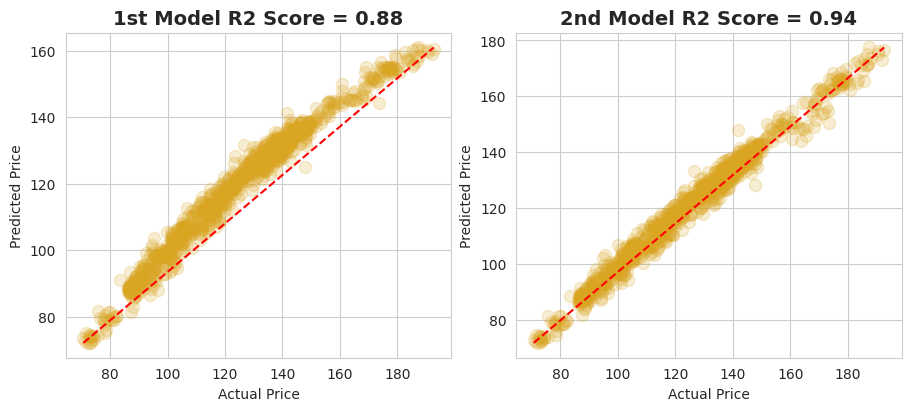

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (9, 4), layout = 'constrained')

axs[0].scatter(original, preds1, s = 75.7, marker = 'o', color = 'goldenrod', alpha = 0.2)
axs[0].plot([min(original), max(original)], [min(preds1), max(preds1)], 'r--')
axs[0].set_title(f'1st Model R2 Score = {R2_1:.2f}', fontweight = 'bold', fontsize = 14)

axs[1].scatter(original, preds2, s = 75.7, marker = 'o', color = 'goldenrod', alpha = 0.2)
axs[1].plot([min(original), max(original)], [min(preds2), max(preds2)], 'r--')
axs[1].set_title(f'2nd Model R2 Score = {R2_2:.2f}', fontweight = 'bold', fontsize = 14)

for ax in axs.flat:
    ax.set(xlabel = 'Actual Price', ylabel = 'Predicted Price')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

google_features = ['adj_close', 'volume', 'dollar_volume', 'obv', 'ma_3_days', 'macd'] # 定义要使用的特征列名列表
google_dset = df_google.filter(google_features) # 从df_google DataFrame中筛选出指定的特征列
google_dset.dropna(axis=0, inplace=True) # 删除包含任何NaN值的行，并直接在原DataFrame上修改

q_80 = int(len(google_dset) * 0.8) # 计算数据集长度的80%位置，用于划分训练集和测试集

google_train = google_dset[:q_80] # 将数据集的前80%作为训练集
google_test = google_dset[q_80:] # 将数据集的后20%作为测试集

scaler = MinMaxScaler(feature_range=(0, 1)) # 初始化一个MinMaxScaler对象，用于将数据缩放到0到1的范围内
google_train_scaled = scaler.fit_transform(google_train) # 使用训练集数据拟合scaler，并对训练集进行缩放
google_test_scaled = scaler.transform(google_test) # 使用训练集拟合的scaler对测试集进行缩放，避免数据泄露

def createXY(dataset, n_past): # 定义一个函数，用于创建时间序列数据的X和Y
    dataX = [] # 初始化一个空列表，用于存储输入特征序列
    dataY = [] # 初始化一个空列表，用于存储目标值
    for i in range(n_past, len(dataset)): # 遍历数据集，从n_past位置开始
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]]) # 将当前位置前n_past个时间步的数据作为输入特征序列添加到dataX
        dataY.append(dataset[i, 0]) # 将当前位置的第一个特征值作为目标值添加到dataY
    return np.array(dataX), np.array(dataY) # 将dataX和dataY转换为NumPy数组并返回

trainX, trainY = createXY(google_train_scaled, 21) # 使用训练集缩放后的数据和n_past=21创建训练集的X和Y
testX, testY = createXY(google_test_scaled, 21) # 使用测试集缩放后的数据和n_past=21创建测试集的X和Y

# 定义 LSTM 模型（PyTorch）
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate):
        super(LSTMModel, self).__init__() # 调用父类的构造函数
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True) # 定义第一个LSTM层，输入大小为input_size，隐藏层大小为hidden_size1，batch_first=True表示输入数据的第一个维度是batch size
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True) # 定义第二个LSTM层，输入大小为hidden_size1，隐藏层大小为hidden_size2
        self.dropout = nn.Dropout(dropout_rate) # 定义一个Dropout层，用于防止过拟合
        self.fc = nn.Linear(hidden_size2, output_size) # 定义一个全连接层，用于输出预测结果

    def forward(self, x):
        out, _ = self.lstm1(x) # 通过第一个LSTM层
        out, _ = self.lstm2(out) # 通过第二个LSTM层
        out = self.dropout(out[:, -1, :]) # 取最后一个时间步的输出，并应用Dropout
        out = self.fc(out) # 通过全连接层
        return out

# 创建 PyTorch Dataset 和 DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32) # 将输入特征转换为PyTorch张量
        self.y = torch.tensor(y, dtype=torch.float32) # 将目标值转换为PyTorch张量

    def __len__(self):
        return len(self.X) # 返回数据集的长度

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx] # 返回指定索引的数据和目标值

train_dataset = TimeSeriesDataset(trainX, trainY) # 创建训练集Dataset
test_dataset = TimeSeriesDataset(testX, testY) # 创建测试集Dataset

# 定义训练函数
def train_model(model, train_loader, optimizer, criterion, epochs):
    model.train() # 设置模型为训练模式
    for epoch in range(epochs): # 遍历所有epoch
        for inputs, targets in train_loader: # 遍历DataLoader
            optimizer.zero_grad() # 清空梯度
            outputs = model(inputs).squeeze() # 模型预测，并移除维度为1的维度
            loss = criterion(outputs, targets) # 计算损失
            loss.backward() # 反向传播
            optimizer.step() # 更新权重

# 定义网格搜索函数
def grid_search_pytorch(trainX, trainY, param_grid, cv=4):
    best_loss = float('inf') # 初始化最佳损失为无穷大
    best_params = None # 初始化最佳参数为None
    results = [] # 初始化结果列表

    for optimizer_name in param_grid['optimizer']: # 遍历优化器
        for batch_size in param_grid['batch_size']: # 遍历批次大小
            for epochs in param_grid['epochs']: # 遍历epoch数
                for learning_rate in param_grid['learning_rate']: # 遍历学习率
                    losses = [] # 初始化损失列表
                    for fold in range(cv): # 遍历交叉验证的折数
                        fold_size = len(trainX) // cv # 计算每折的大小
                        val_start = fold * fold_size # 计算验证集的起始索引
                        val_end = (fold + 1) * fold_size # 计算验证集的结束索引
                        val_X, val_y = trainX[val_start:val_end], trainY[val_start:val_end] # 获取验证集
                        train_fold_X = np.concatenate([trainX[:val_start], trainX[val_end:]]) # 获取训练集
                        train_fold_y = np.concatenate([trainY[:val_start], trainY[val_end:]]) # 获取训练集

                        train_fold_dataset = TimeSeriesDataset(train_fold_X, train_fold_y) # 创建训练集Dataset
                        train_fold_loader = DataLoader(train_fold_dataset, batch_size=batch_size, shuffle=True) # 创建训练集DataLoader

                        val_dataset = TimeSeriesDataset(val_X, val_y) # 创建验证集Dataset
                        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # 创建验证集DataLoader

                        model = LSTMModel(input_size=6, hidden_size1=100, hidden_size2=50, output_size=1, dropout_rate=0.1) # 创建模型
                        if optimizer_name == 'adam':
                            optimizer = optim.Adam(model.parameters(), lr=learning_rate) # 创建Adam优化器
                        else:
                            optimizer = optim.Adadelta(model.parameters(), lr=learning_rate) # 创建Adadelta优化器
                        criterion = nn.MSELoss() # 创建均方误差损失函数

                        train_model(model, train_fold_loader, optimizer, criterion, epochs) # 训练模型

                        model.eval() # 设置模型为评估模式
                        val_loss = 0.0 # 初始化验证集损失
                        with torch.no_grad(): # 关闭梯度计算
                            for inputs, targets in val_loader: # 遍历验证集DataLoader
                                outputs = model(inputs).squeeze() # 模型预测
                                val_loss += criterion(outputs, targets).item() # 计算验证集损失
                        val_loss /= len(val_loader) # 计算平均验证集损失
                        losses.append(val_loss) # 将验证集损失添加到损失列表

                    avg_loss = np.mean(losses) # 计算平均损失
                    results.append({ # 将结果添加到结果列表
                          'optimizer': optimizer_name,
                          'batch_size': batch_size,
                          'epochs': epochs,
                          'learning_rate': learning_rate,
                          'avg_loss': avg_loss
                      })

                    if avg_loss < best_loss:
                        best_loss = avg_loss
                        best_params = {
                            'optimizer': optimizer_name,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'learning_rate': learning_rate
                        }

    return best_params, results

# 执行网格搜索
#param_grid = {
#    'optimizer': ['adam', 'adadelta'],
#    'batch_size': [12, 20, 24],
#    'epochs': [15, 20],
#    'learning_rate': [0.001, 0.01]
#}

param_grid = {
    'optimizer': ['adam'],
    'batch_size': [12, 20, 24],
    'epochs': [20],
    'learning_rate': [0.001]
}



best_params, results = grid_search_pytorch(trainX, trainY, param_grid, cv=4)

print(f"Best parameters: {best_params}")

# 使用最佳参数训练最终模型
best_model = LSTMModel(input_size=6, hidden_size1=100, hidden_size2=50, output_size=1, dropout_rate=0.1)
if best_params['optimizer'] == 'adam':
    best_optimizer = optim.Adam(best_model.parameters(), lr=best_params['learning_rate'])
else:
    best_optimizer = optim.Adadelta(best_model.parameters(), lr=best_params['learning_rate'])
criterion = nn.MSELoss()
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
train_model(best_model, train_loader, best_optimizer, criterion, best_params['epochs'])

# 保存模型
torch.save(best_model.state_dict(), 'best_model.pth')

# 加载模型
loaded_model = LSTMModel(input_size=6, hidden_size1=100, hidden_size2=50, output_size=1, dropout_rate=0.1)
loaded_model.load_state_dict(torch.load('best_model.pth'))
loaded_model.eval()

# 预测
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
with torch.no_grad():
    for inputs, _ in test_loader:
        predictions = loaded_model(inputs).squeeze().numpy()

print("Predictions:", predictions)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Best parameters: {'optimizer': 'adam', 'batch_size': 12, 'epochs': 20, 'learning_rate': 0.001}


<ipython-input-32-9816e2450034>:175: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('best_model.pth'))


Predictions: [0.94727576 0.92727566 0.9398029  0.92473775 0.92532367 0.9322492
 0.94340444 0.951895   0.9513941  0.9592858  0.9495945  0.9578978
 0.946589   0.94472456 0.9565811  0.9745095  1.0025381  1.0151911
 1.0140829  1.0091534  1.0141001  0.9994415  1.0024308  1.0198953
 1.0405439  1.0569828  1.0366744  1.0368143  0.99506915 1.0050377
 1.0276045  1.0481846  1.0634933  1.1035523  1.1311053  1.1369975
 1.1336522  1.1225402  1.1306585  1.1297939  1.1419742  1.1482797
 1.1442509  1.1309364  1.1341891  1.1226519  1.1184461  1.1329731
 1.1400108  1.1522601  1.1370859  1.1505412  1.1686969  1.1737875
 1.1744578  1.1702551  1.1694494  1.1522566  1.1446987  1.1453961
 1.1353586  1.1367766  1.1341636  1.1266625  1.1082094  1.1171241
 1.1133249  1.1158829  1.1221561  1.13695    1.1342783  1.1233404
 1.1250474  1.1128929  1.1193709  1.1128416  1.1373551  1.1538763
 1.1435299  1.1282368  1.1280452  1.1230712  1.120065   1.1416131
 1.1887512  1.2067363  1.2165294  1.2124151  1.2240081  1.18295

Prediction Shape : (986,)


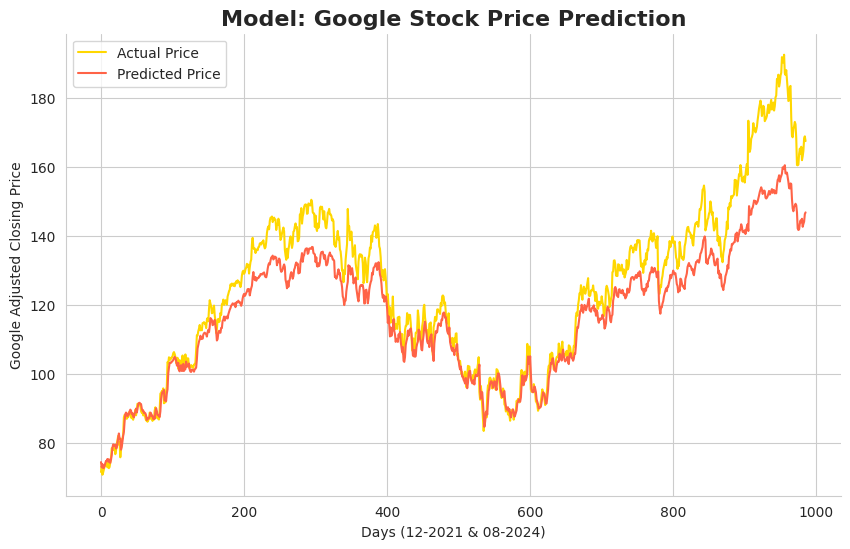

MAE = 7.3992 
MAPE = 0.0526 
R2 score = 0.8454


In [ ]:

print('Prediction Shape :', predictions.shape) # 打印预测结果的形状

# 更改形状以使用逆变换
prediction_array = np.repeat(predictions, 6, axis = -1) # 将预测结果在最后一个轴上重复6次，以便进行逆变换
original_array = np.repeat(testY, 6, axis = -1) # 将测试集的目标值在最后一个轴上重复6次，以便进行逆变换

# 我们只需要逆变换后的adj_close（第一列），在末尾使用[:,0]
preds = scaler.inverse_transform(np.reshape(prediction_array,(len(predictions), 6)))[:,0] # 对预测结果进行逆变换，并提取第一列（adj_close）
preds2 = preds
original = scaler.inverse_transform(np.reshape(original_array,(len(testY), 6)))[:,0] # 对测试集的目标值进行逆变换，并提取第一列（adj_close）
preds.shape, original.shape # 打印逆变换后的预测结果和目标值的形状

# 可视化真实收盘价和预测收盘价，以评估模型预测性能
plt.figure(figsize = (10, 6)) # 创建一个大小为10x6的图形
sns.set_style('whitegrid') # 设置seaborn的样式为白色网格

plt.plot(original, color = 'gold', label = 'Actual Price') # 绘制真实收盘价，颜色为金色，标签为'Actual Price'
plt.plot(preds, color = 'tomato', label = 'Predicted Price') # 绘制预测收盘价，颜色为番茄色，标签为'Predicted Price'
plt.xlabel('Days (12-2021 & 08-2024)') # 设置x轴标签
plt.ylabel('Google Adjusted Closing Price') # 设置y轴标签
plt.title('Model: Google Stock Price Prediction', fontweight = 'bold', fontsize = 16) # 设置图形标题，加粗字体，字体大小为16

plt.legend() # 显示图例
sns.despine() # 移除图形的边框
plt.show() # 显示图形

# 计算预测模型的常用评估指标
mae = round(mean_absolute_error(original, preds), 4) # 计算平均绝对误差（MAE），保留4位小数
mape = round(mean_absolute_percentage_error(original, preds), 4) # 计算平均绝对百分比误差（MAPE），保留4位小数
R2 = round(r2_score(original, preds), 4) # 计算R2分数，保留4位小数

print('MAE =', mae, '\nMAPE =', mape, '\nR2 score =', R2) # 打印评估指标